1. Import Library

In [1]:
import os
import shutil
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

2. Atur Path & Konfigurasi

In [2]:
base_dir = "kendaraan"  # Folder awal
train_dir = os.path.join(base_dir, "train")
val_dir = os.path.join(base_dir, "val")
img_size = (224, 224)
batch_size = 32
num_classes = 2
epochs = 10

3. Bagi Dataset ke Train & Val

In [3]:
def split_data(base_dir, classes, test_size=0.2):
    for cls in classes:
        cls_dir = os.path.join(base_dir, cls)
        images = os.listdir(cls_dir)
        train_files, val_files = train_test_split(images, test_size=test_size, random_state=42)

        for folder in ['train', 'val']:
            os.makedirs(os.path.join(base_dir, folder, cls), exist_ok=True)

        for f in train_files:
            shutil.copy(os.path.join(cls_dir, f), os.path.join(base_dir, 'train', cls, f))
        for f in val_files:
            shutil.copy(os.path.join(cls_dir, f), os.path.join(base_dir, 'val', cls, f))

# Jalankan split hanya jika belum ada folder train/val
if not os.path.exists(train_dir):
    split_data(base_dir, ['mobil', 'motor'])

4. Data Generator

In [4]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    zoom_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)
val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

Found 240 images belonging to 2 classes.
Found 61 images belonging to 2 classes.


5. Model VGG16

In [5]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False

x = base_model.output
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 118s 2us/step


6. Compile & Train

In [6]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

callbacks = [
    EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True),
    ModelCheckpoint('best_model_vgg16_kendaraan.h5', save_best_only=True)
]

history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=val_generator,
    callbacks=callbacks
)

C:\Users\acer\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9s/step - accuracy: 0.6297 - loss: 1.7713

8/8 ━━━━━━━━━━━━━━━━━━━━ 104s 13s/step - accuracy: 0.6347 - loss: 1.7809 - val_accuracy: 0.9344 - val_loss: 0.4248
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9s/step - accuracy: 0.7845 - loss: 1.9676 

8/8 ━━━━━━━━━━━━━━━━━━━━ 88s 12s/step - accuracy: 0.7871 - loss: 1.9008 - val_accuracy: 0.9836 - val_loss: 0.0853
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 128s 9s/step - accuracy: 0.9159 - loss: 0.3005 - val_accuracy: 0.9836 - val_loss: 0.1046
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 67s 9s/step - accuracy: 0.9223 - loss: 0.2926 - val_accuracy: 0.9836 - val_loss: 0.1449
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.9217 - loss: 0.2236

8/8 ━━━━━━━━━━━━━━━━━━━━ 63s 8s/step - accuracy: 0.9234 - loss: 0.2219 - val_accuracy: 0.9836 - val_loss: 0.0314
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 65s 8s/step - accuracy: 0.9751 - loss: 0.0986 - val_accuracy: 0.9836 - val_loss: 0.0668
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7s/step - accuracy: 0.9326 - loss: 0.1580

8/8 ━━━━━━━━━━━━━━━━━━━━ 70s 9s/step - accuracy: 0.9359 - loss: 0.1506 - val_accuracy: 0.9836 - val_loss: 0.0183
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.9591 - loss: 0.1021

8/8 ━━━━━━━━━━━━━━━━━━━━ 71s 9s/step - accuracy: 0.9590 - loss: 0.1038 - val_accuracy: 0.9836 - val_loss: 0.0132
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.9845 - loss: 0.0405

8/8 ━━━━━━━━━━━━━━━━━━━━ 68s 9s/step - accuracy: 0.9844 - loss: 0.0413 - val_accuracy: 1.0000 - val_loss: 0.0107
Epoch 10/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 83s 8s/step - accuracy: 0.9952 - loss: 0.0312 - val_accuracy: 0.9836 - val_loss: 0.0145


7. Visualisasi

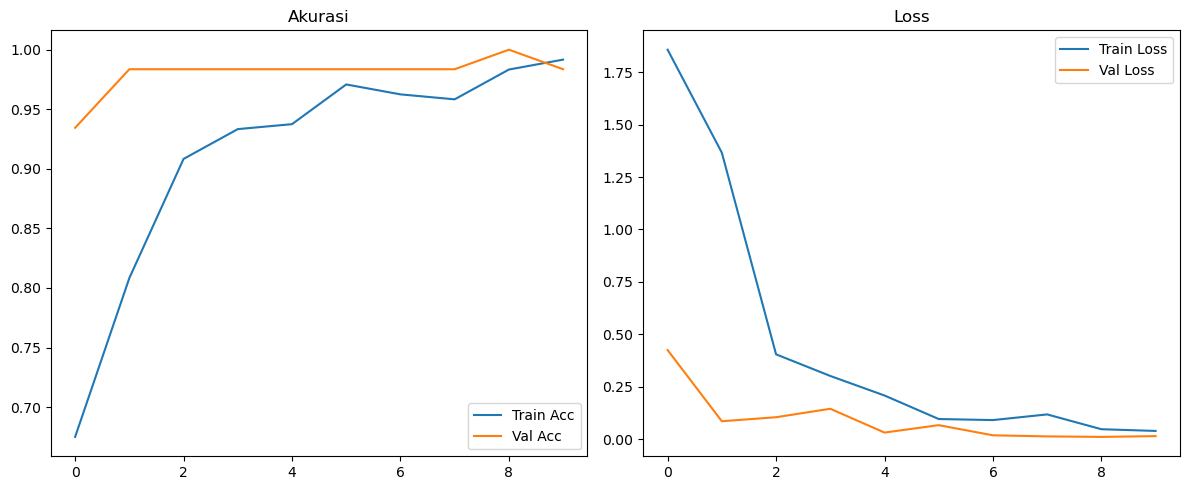

In [10]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Akurasi')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.legend()

plt.tight_layout()
plt.show()

8. Prediksi

In [16]:
import os
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 838ms/step


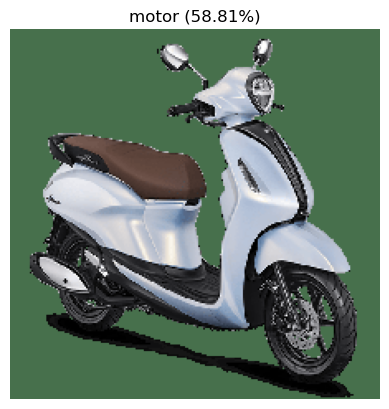

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 645ms/step


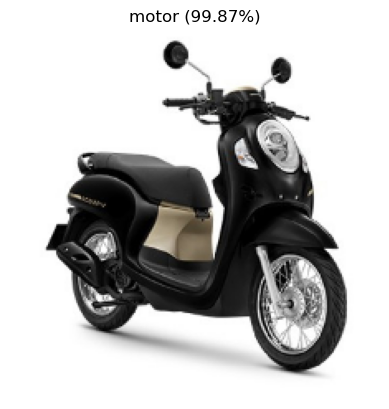

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 606ms/step


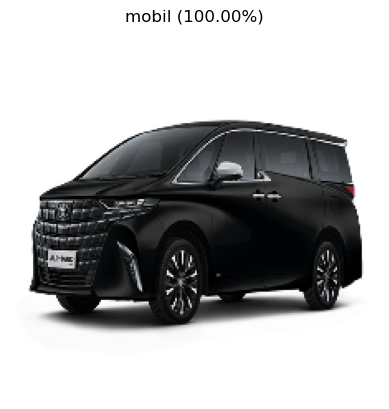

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 498ms/step


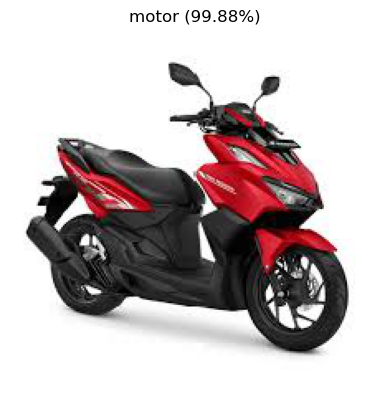

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 590ms/step


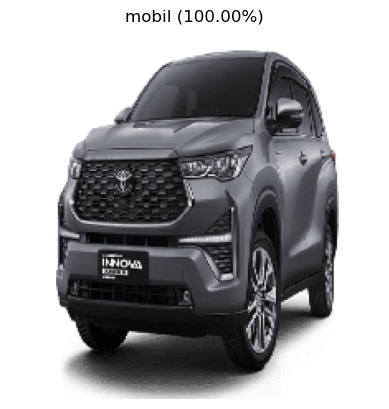

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 832ms/step


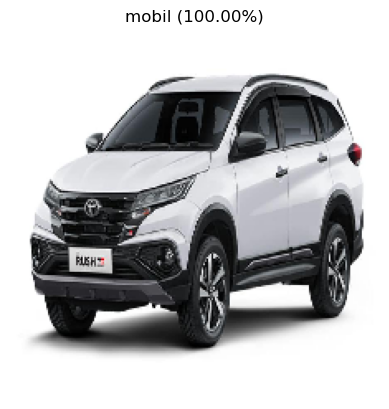

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 743ms/step


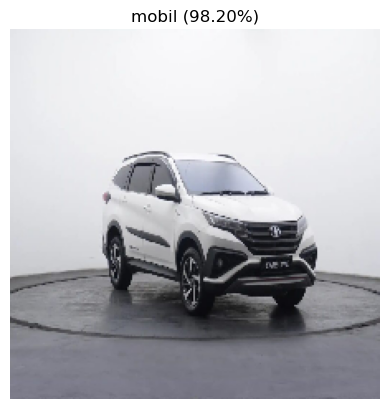

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 828ms/step


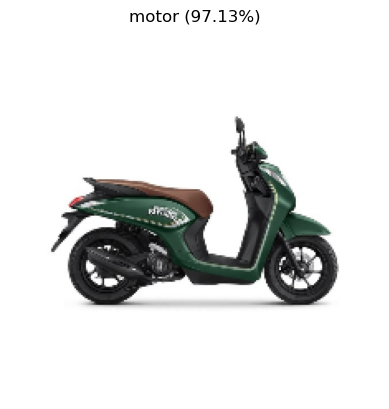

In [17]:
# Label sesuai urutan class_indices
class_labels = ['mobil', 'motor']

# Load model terbaik
model = load_model('best_model_vgg16_kendaraan.h5')

# Path folder gambar
test_folder = 'prediksi'

# Prediksi dan tampilkan gambar
for fname in os.listdir(test_folder):
    if fname.lower().endswith(('.jpg', '.png', '.jpeg')):
        img_path = os.path.join(test_folder, fname)
        img = image.load_img(img_path, target_size=(224, 224))
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0) / 255.0

        prediction = model.predict(img_array)
        class_index = np.argmax(prediction)
        confidence = np.max(prediction)

        label = f"{class_labels[class_index]} ({confidence*100:.2f}%)"

        # Tampilkan gambar dengan label
        plt.imshow(img)
        plt.title(label)
        plt.axis('off')
        plt.show()

9. Prediksi Webcam

In [18]:
import cv2

# Label kelas
class_labels = ['mobil', 'motor']

# Load model
model = load_model('best_model_vgg16_kendaraan.h5')

# Mulai webcam
cap = cv2.VideoCapture(0)
print("Tekan 'q' untuk keluar.")

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Resize dan preprocess
    img_resized = cv2.resize(frame, (224, 224))
    img_array = image.img_to_array(img_resized)
    img_array = np.expand_dims(img_array, axis=0) / 255.0

    # Prediksi
    prediction = model.predict(img_array)
    class_index = np.argmax(prediction)
    confidence = np.max(prediction)
    label = f"{class_labels[class_index]} ({confidence*100:.2f}%)"

    # Tampilkan di layar
    cv2.putText(frame, label, (10, 30), cv2.FONT_HERSHEY_SIMPLEX,
                1, (0, 255, 0), 2)
    cv2.imshow("Webcam Kendaraan Classifier", frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

Tekan 'q' untuk keluar.
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 922ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 689ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 647ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 760ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 645ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 561ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 512ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 530ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 524ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 494ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 507ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 496ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 548ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 534ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 540ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 553ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 538ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 503ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 520ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 526ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 530ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 526ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 494ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 530ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 581ms/step
1

11. Hasil Prediksi Webcam

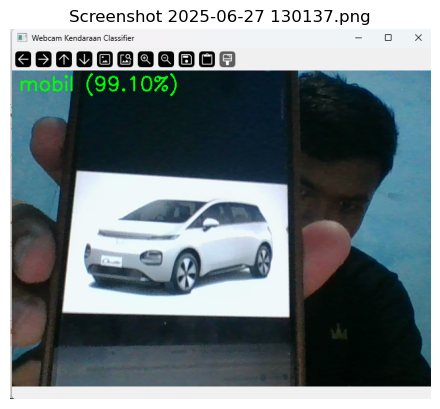

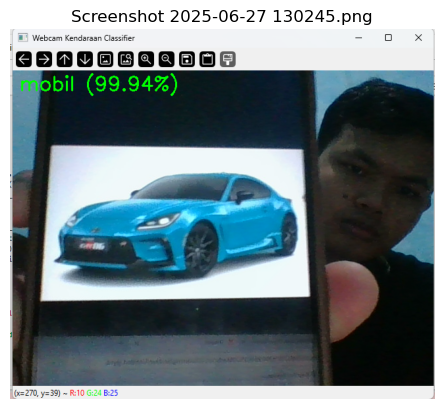

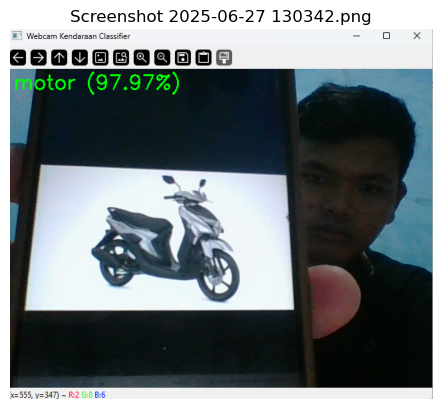

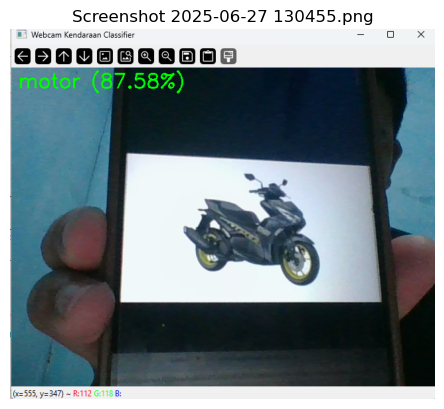

In [19]:
import matplotlib.image as mpimg

folder_path = 'teskendaraan' 

for fname in os.listdir(folder_path):
    if fname.lower().endswith(('.jpg', '.png', '.jpeg')):
        img_path = os.path.join(folder_path, fname)
        img = mpimg.imread(img_path)
        plt.imshow(img)
        plt.title(fname)
        plt.axis('off')
        plt.show()